In [2]:
import xarray as xr
import numpy as np

In [3]:
files = ['https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B1.TIF', 
'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B2.TIF',
'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B3.TIF',
'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B4.TIF',
'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B5.TIF',
'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B6.TIF',
'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B7.TIF',
'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/044/034/LC08_L1GT_044034_20130330_20170310_01_T2/LC08_L1GT_044034_20130330_20170310_01_T2_B8.TIF',
]
landsat = xr.open_mfdataset(files, engine='rasterio', concat_dim='band', combine='nested')

/Users/rwegener/.pyenv/versions/miniconda3-4.7.12/envs/sarp/lib/python3.10/site-packages/xarray/core/indexing.py:1234: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/rwegener/.pyenv/versions/miniconda3-4.7.12/envs/sarp/lib/python3.10/site-packages/xarray/core/indexing.py:1234: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.spl

1. Look at the xarray represenation of the output. What are the dimensions of this dataset?

In [4]:
landsat

<xarray.Dataset>
Dimensions:      (x: 15021, y: 14841, band: 8)
Coordinates:
  * x            (x) float64 3.324e+05 3.324e+05 ... 5.577e+05 5.577e+05
  * y            (y) float64 4.036e+06 4.036e+06 ... 4.259e+06 4.259e+06
  * band         (band) int64 1 1 1 1 1 1 1 1
    spatial_ref  int64 0
Data variables:
    band_data    (band, y, x) float32 dask.array<chunksize=(1, 14841, 15021), meta=np.ndarray>

2. Get just the `band_data` DataArray and assign it to its own variable.

In [11]:
bands = landsat['band_data']

3. On a piece of paper draw this data as a cube. Label each of the size with the dimension name and the number of pixels.

4. What is the spatial domain of the dataarray? What are the CRS and the units?

In [18]:
bands.rio.crs
# UTM crs, so units are meters

CRS.from_epsg(32610)

4. What is the bounding box of this image? Draw a box on your piece of paper and label the minimum x, minimum y, maximum x, maximum y lines. Also label the size in meters of each side.

In [16]:
bands.rio.bounds()

(332385.0, 4258785.0, 557715.0, 4036215.0)

In [17]:
bands

<xarray.DataArray 'band_data' (band: 8, y: 14841, x: 15021)>
dask.array<concatenate, shape=(8, 14841, 15021), dtype=float32, chunksize=(1, 14841, 15021), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 3.324e+05 3.324e+05 ... 5.577e+05 5.577e+05
  * y            (y) float64 4.036e+06 4.036e+06 ... 4.259e+06 4.259e+06
  * band         (band) int64 1 1 1 1 1 1 1 1
    spatial_ref  int64 0

5. This is a big image, so let's select a subset that is just from 450,000 to 550,000 in the x and 4,100,000 to 4,150,000 in the y.

In [25]:
subset = bands.sel(x=slice(450000, 550000), y=slice(4100000, 4150000))

In [26]:
subset

<xarray.DataArray 'band_data' (band: 8, y: 3333, x: 6667)>
dask.array<getitem, shape=(8, 3333, 6667), dtype=float32, chunksize=(1, 3333, 6667), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 4.5e+05 4.5e+05 4.5e+05 ... 5.5e+05 5.5e+05 5.5e+05
  * y            (y) float64 4.1e+06 4.1e+06 4.1e+06 ... 4.15e+06 4.15e+06
  * band         (band) int64 1 1 1 1 1 1 1 1
    spatial_ref  int64 0

6. Let's make a new data array for just the 3rd band (band3). What is the minimum and maximum values in this band?

> When you are running computions on a cloud dataset in zarr there is an extra step you must take. After your line of code that says, for example, `band3.max()` you need to add `.compute()`, for example `band3.max().compute()`. This will then go fetch the data to compute the max. The line will likely take longer to run, because of the data fetching process.

In [33]:
band3 = bands.isel(band=3)

In [35]:
band3.max().compute()  # 63936

<xarray.DataArray 'band_data' ()>
array(63936., dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

In [36]:
band3.min().compute()  # 0

<xarray.DataArray 'band_data' ()>
array(0., dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

(array([1.8012871e+07, 1.7306317e+07, 4.1737930e+06, 4.6763000e+06,
        5.3549260e+06, 5.1294360e+06, 1.0218430e+06, 6.0384000e+04,
        2.9820000e+03, 2.7900000e+02]),
 array([    0. ,  6393.6, 12787.2, 19180.8, 25574.4, 31968. , 38361.6,
        44755.2, 51148.8, 57542.4, 63936. ], dtype=float32),
 <BarContainer object of 10 artists>)

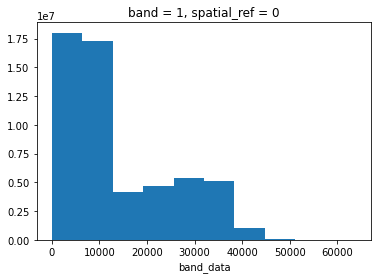

In [37]:
band3.plot.hist()

7. Say we are only interested in reflectance values above 10000. Create a mask (a new DataArray) that returns True if the data value is above 10000 and False if the data value is below that. (Do this for band3)

In [38]:
np.where(band3 > 10000, True, False)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

8. Now let's say that we think that 0 is a nodata value. Update the existing DataArray to return `np.nan` if the value is equal to 0 and the same original value of the DataArray if the value is anything else. (Do this for band3)

_Note: you will have to `import numpy as np` in order to access `np.nan`._

In [44]:
np.where(band3 == 0, np.nan, band3)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)